##Mount gDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/Final Project')

Mounted at /content/drive


Koneksikan ke google drive untuk penyimpanan dataset danjuga .jpynb

##import Libarry|

In [ ]:
# Importing necessary libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Konfigurasi agar visualisasi lebih rapi
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

Import libary yang digunakan untuk mengolah dan mengvisualisasikan data set beserta pemodelanya

##import dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bengkel Coding Data Saince/Final Project/ObesityDataSet.csv')

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


#1 Exploratory Data Analysis (EDA)


##Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
df.shape

(2111, 17)

In [ ]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


##Cek Missing Values, Unique Values, & Cek Data Duplikat

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [ ]:
# Check for unique values in each column
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [ ]:
# Check for duplicate
df.duplicated().sum()

np.int64(18)

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


##Distribusi Target dan Boxplot untuk Deteksi Outlier


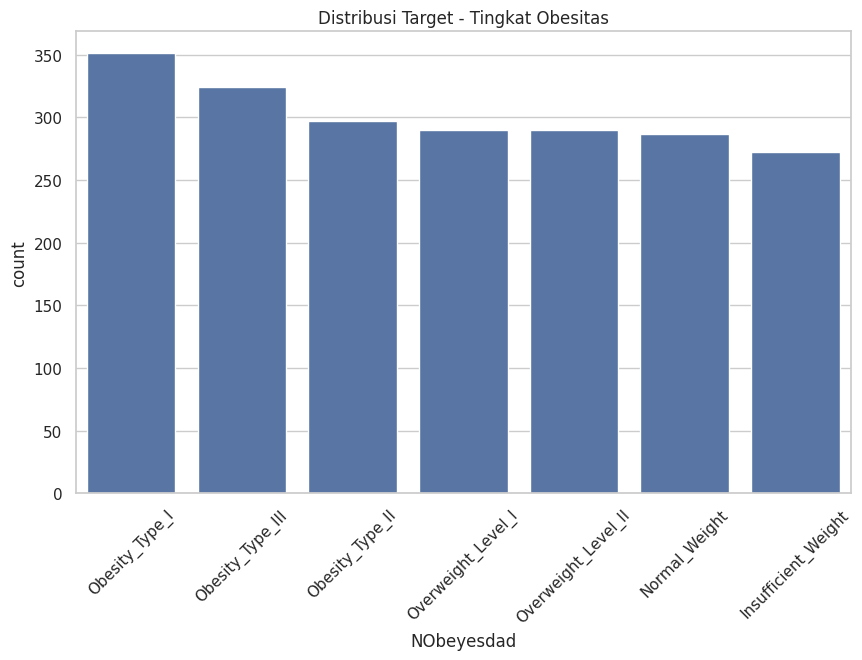

In [ ]:
# Visualisasi distribusi kelas target obesitas
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Target - Tingkat Obesitas')
plt.show()

In [ ]:
# Boxplot untuk mendeteksi outlier pada fitur numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

if len(numeric_cols) > 0:
    df[numeric_cols].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found in the DataFrame to plot.")

No numeric columns found in the DataFrame to plot.


## Cek  Keseimbangan Data

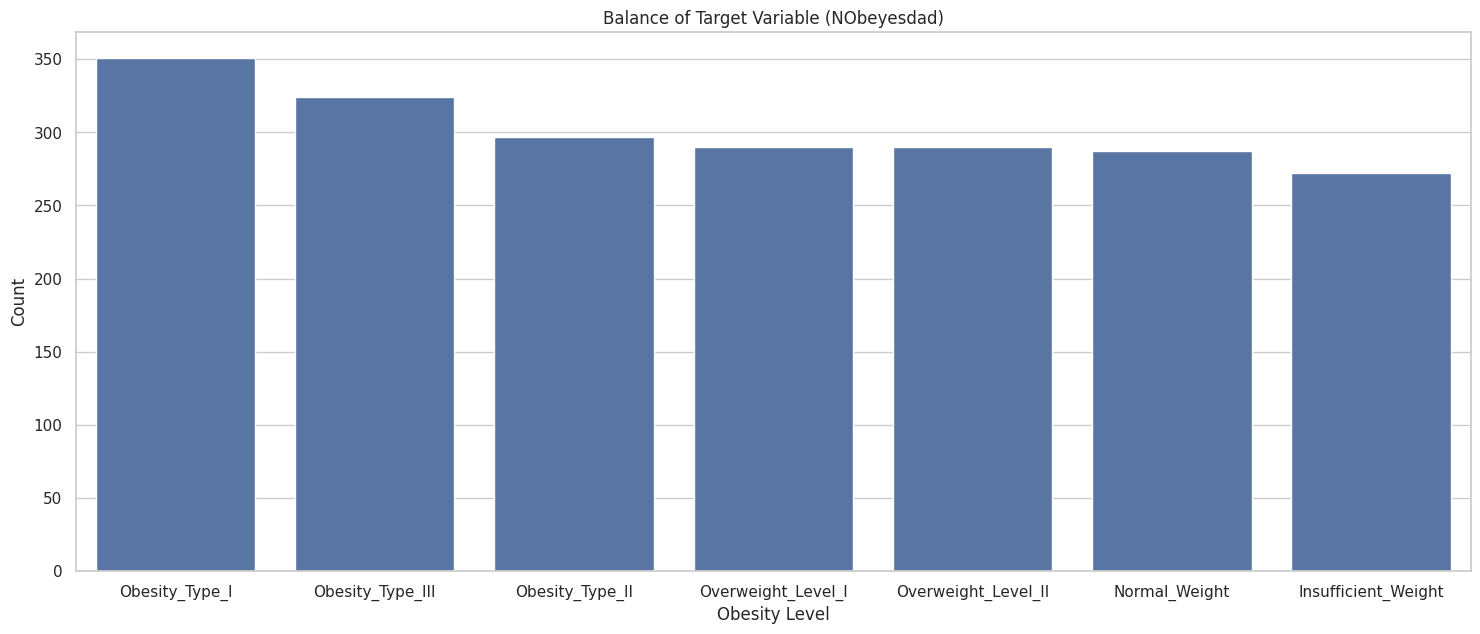

In [ ]:
target_counts = df['NObeyesdad'].value_counts()

plt.figure(figsize=(18, 7))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Balance of Target Variable (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()


##Deteksi Outlier Menggunakan Boxplot

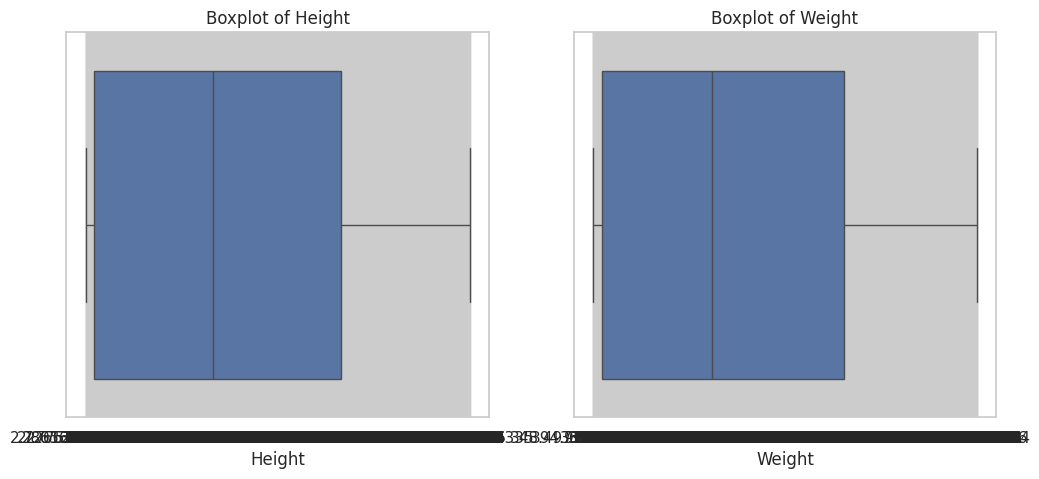

In [ ]:
# Boxplot for Height and Weight
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Height'])
plt.title('Boxplot of Height')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')

plt.show()


In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


##Kesimpulan

Kesimpulan dari EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.
2. Terdapat 150 missing values di dataset.
3. Terdapat 18 duplikat data.
4. Target variable 'NObeyesdad' memiliki distribusi yang tidak seimbang, terlihat dari Outlayernya

#2 Preprocessing Data

##Ubah Tipe Data ke Numerik

In [ ]:
# Melihat tipe data awal dari dataset
df.dtypes

,0
Age,object
Gender,object
Height,object
Weight,object
CALC,object
FAVC,object
FCVC,object
NCP,object
SCC,object
SMOKE,object


In [ ]:
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerik_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek hasil tipe datanya
df[numerik_cols].dtypes

,0
Age,float64
Height,float64
Weight,float64
FCVC,float64
NCP,float64
CH2O,float64
FAF,float64
TUE,float64


In [ ]:
for col in numerik_cols:
    print(f"{col} - Tipe: {df[col].dtype}, Sample: {df[col].unique()[:5]}")

Age - Tipe: float64, Sample: [21. 23. 27. 22. 29.]
Height - Tipe: float64, Sample: [1.62 1.52 1.8  1.78 1.5 ]
Weight - Tipe: float64, Sample: [64.  56.  77.  87.  89.8]
FCVC - Tipe: float64, Sample: [2.         3.         1.                nan 8.14899274]
NCP - Tipe: float64, Sample: [ 3.          1.          4.         10.84070601         nan]
CH2O - Tipe: float64, Sample: [2.         3.         1.                nan 8.28395253]
FAF - Tipe: float64, Sample: [ 0.          3.          2.          1.         10.13398019]
TUE - Tipe: float64, Sample: [1.        0.        2.              nan 7.0406971]


In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


In [ ]:
for col in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CALC', 'CAEC', 'Gender', 'MTRANS', 'NObeyesdad']:
    print(f"{col}:", df[col].unique())

FAVC: ['no' 'yes' '?' nan]
SCC: ['no' 'yes' nan '?']
SMOKE: ['no' 'yes' '?' nan]
family_history_with_overweight: ['yes' 'no' nan '?']
CALC: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
CAEC: ['Sometimes' 'Frequently' 'Always' 'no' nan '?']
Gender: ['Female' 'Male' '?' nan]
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
df.replace('?', np.nan, inplace=True)

# Tampilkan jumlah missing values per kolom
print("Missing value count:\n", df.isnull().sum())

Missing value count:
 Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64


In [ ]:
#Lihat Nilai Unik untuk Identifikasi Tipe Fitur
for col in ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CALC', 'CAEC', 'Gender', 'MTRANS']:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

# Cek ulang apakah masih ada missing
print("Missing value count setelah imputasi:\n", df.isnull().sum())

Missing value count setelah imputasi:
 Age                               22
Gender                             0
Height                            22
Weight                            19
CALC                               0
FAVC                               0
FCVC                              18
NCP                               22
SCC                                0
SMOKE                              0
CH2O                              15
family_history_with_overweight     0
FAF                               19
TUE                               15
CAEC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64


In [ ]:
#Label Encoding untuk Fitur Biner
biner_cols = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']

# Bersihkan dan encode
for col in biner_cols:
    df[col] = df[col].str.strip().str.lower()  # bersihkan whitespace dan konsistensi huruf
    df[col] = df[col].map({'yes': 1, 'no': 0})  # label encoding


Kolom biner seperti FAVC diubah dari yes/no menjadi 1/0.

In [ ]:
#Label Encoding untuk Fitur Ordinal
# CALC: 'no' < 'Sometimes' < 'Frequently' < 'Always'
calc_order = {'no': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
# CAEC: 'no' < 'Sometimes' < 'Frequently' < 'Always'
caec_order = {'no': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}

df['CALC'] = df['CALC'].str.strip().str.lower().map(calc_order)
df['CAEC'] = df['CAEC'].str.strip().str.lower().map(caec_order)


Kolom ordinal seperti CALC dan CAEC memiliki urutan logis dan diubah menjadi nilai angka dengan urutan tersebut.


In [ ]:
#One-Hot Encoding untuk Gender dan MTRANS
# Bersihkan string
df['Gender'] = df['Gender'].str.strip()
df['MTRANS'] = df['MTRANS'].str.strip()

# One-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'MTRANS'], prefix=['Gender', 'MTRANS'])


Kolom Gender dan MTRANS diubah ke format One-Hot Encoding agar model bisa membaca kategori tanpa memberi urutan yang salah.

In [ ]:
#Label Encoding untuk Target NObeyesdad
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'].astype(str))


In [ ]:
# Pastikan semua fitur sudah numerik
print(df.dtypes)

# Pastikan tidak ada missing
print("Missing values:\n", df.isnull().sum())


Age                               float64
Height                            float64
Weight                            float64
CALC                                int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SCC                                 int64
SMOKE                               int64
CH2O                              float64
family_history_with_overweight      int64
FAF                               float64
TUE                               float64
CAEC                                int64
NObeyesdad                          int64
Gender_Female                        bool
Gender_Male                          bool
MTRANS_Automobile                    bool
MTRANS_Bike                          bool
MTRANS_Motorbike                     bool
MTRANS_Public_Transportation         bool
MTRANS_Walking                       bool
dtype: object
Missing values:
 Age                               22
Height  

##Handling Missing Values & Duplikasi

In [ ]:
#Imputasi Missing Value Numerik

numerical_missing = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Imputasi nilai NaN dengan median tiap kolom
for col in numerical_missing:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Verifikasi apakah masih ada missing value
print("Missing value count setelah imputasi numerik:\n", df.isnull().sum())


Missing value count setelah imputasi numerik:
 Age                               0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
NObeyesdad                        0
Gender_Female                     0
Gender_Male                       0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64


In [ ]:
# Cek jumlah baris duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus baris duplikat jika ada
df.drop_duplicates(inplace=True)

# Verifikasi ulang
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")


Jumlah baris duplikat: 20
Jumlah baris setelah menghapus duplikat: 2091


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

Jumlah baris duplikat: 0


##Outlier

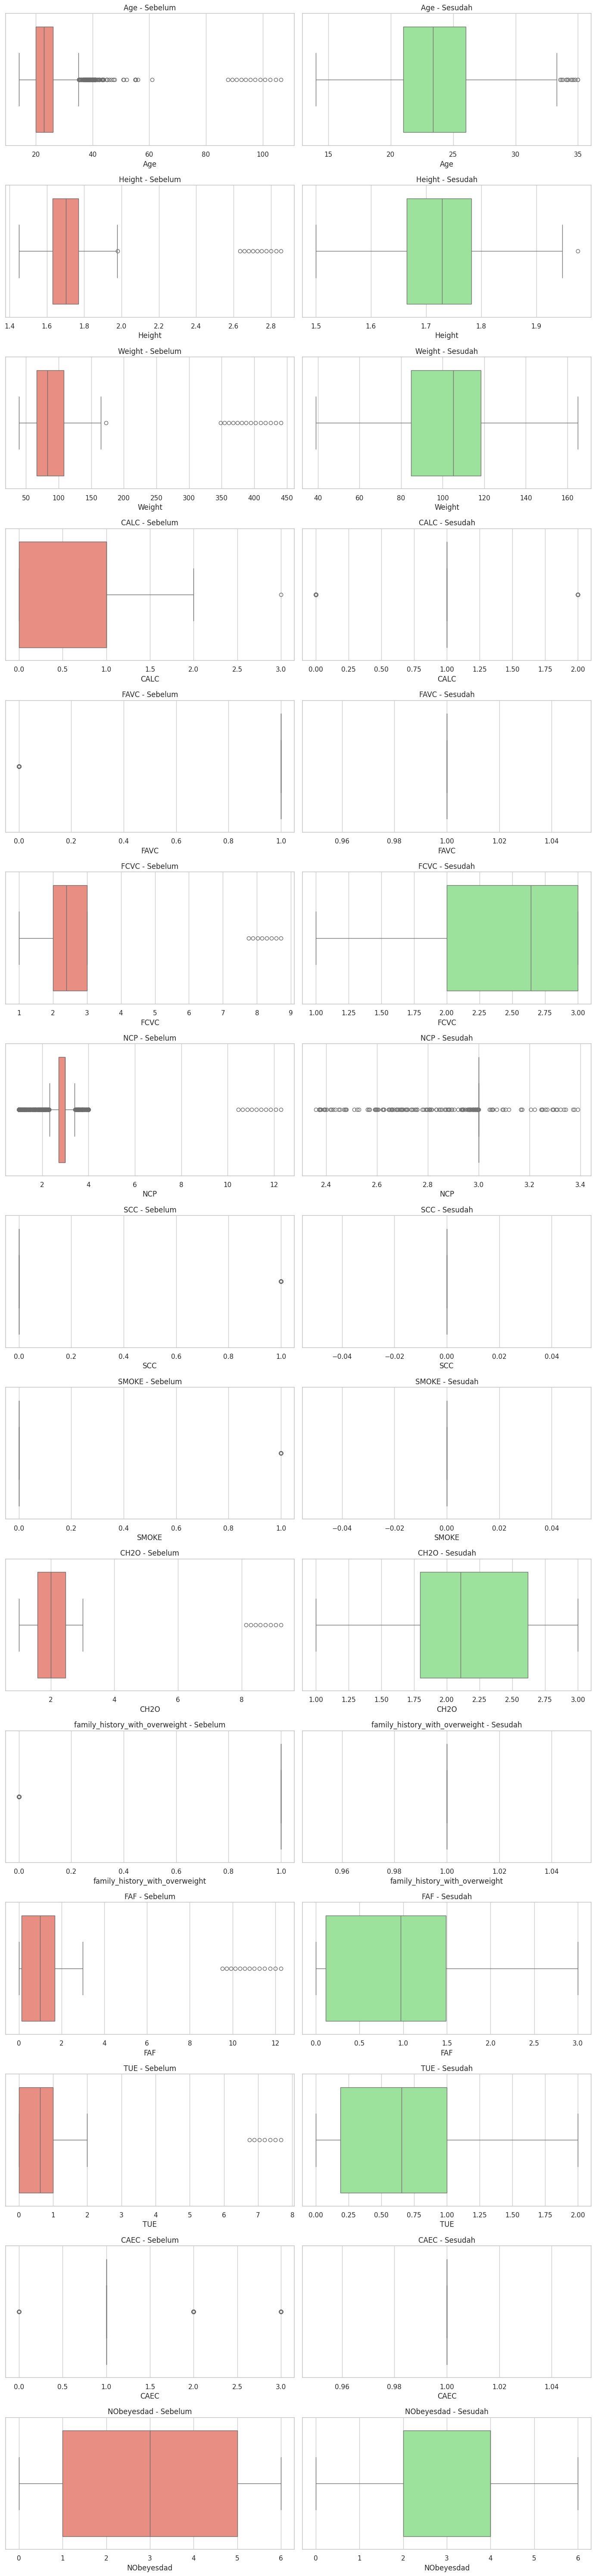

In [ ]:
# Pastikan semua kolom numerik valid dan memiliki nilai
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if df[col].notnull().sum() > 0]

# Simpan dataframe sebelum outlier dihapus
df_before = df.copy()

# Hitung IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Hapus outlier
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualisasi boxplot sebelum dan sesudah outlier
n = len(numeric_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(14, 4 * n))

# Jika hanya 1 kolom, atur axis sebagai array 2 dimensi
if n == 1:
    axes = [axes]

for i, col in enumerate(numeric_cols):
    # Sebelum outlier removal
    sns.boxplot(x=df_before[col], ax=axes[i][0], color='salmon')
    axes[i][0].set_title(f'{col} - Sebelum')

    # Setelah outlier removal
    sns.boxplot(x=df[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'{col} - Sesudah')

plt.tight_layout()
plt.show()

## Evaluasi Fitur (Feature Selection)

Fitur yang tersedia:

['Age', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'NObeyesdad', 'Gender_Female', 'Gender_Male', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_enc']


<ipython-input-37-f0ef62248cd6>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')


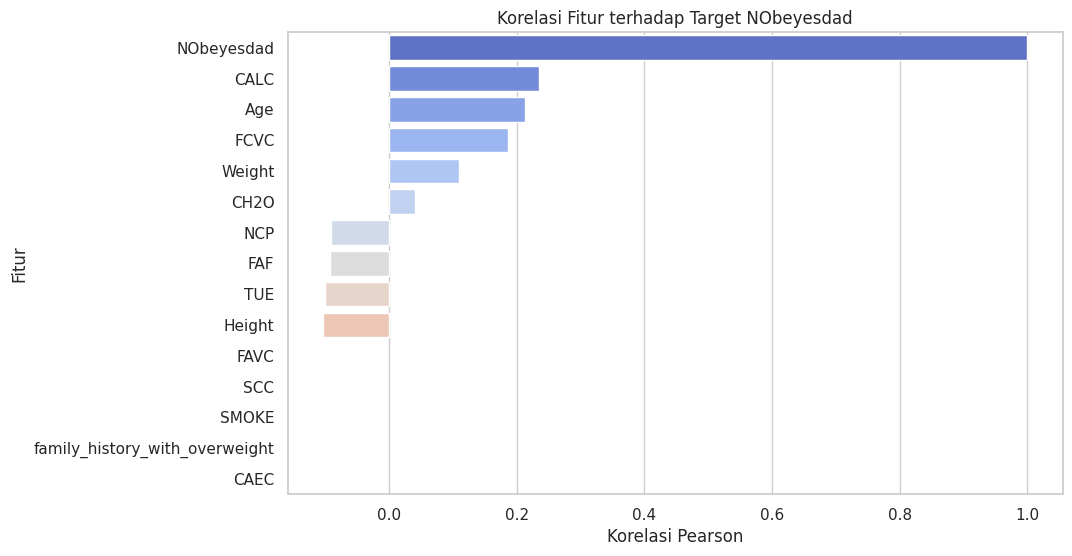

In [ ]:
# Encode target jika kategorikal
if df['NObeyesdad'].dtype == 'object':
    le = LabelEncoder()
    df['NObeyesdad_enc'] = le.fit_transform(df['NObeyesdad'])
else:
    # If NObeyesdad is already numeric, just use it
    df['NObeyesdad_enc'] = df['NObeyesdad']
# Tampilkan semua nama kolom untuk evaluasi manual
print("Fitur yang tersedia:\n")
print(df.columns.tolist())
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Hitung korelasi terhadap target yang sudah di-encode
# Ensure 'NObeyesdad_enc' is in the numeric_df before calculating correlation
if 'NObeyesdad_enc' in numeric_df.columns:
    correlation = numeric_df.corr()['NObeyesdad_enc'].drop('NObeyesdad_enc', errors='ignore').sort_values(ascending=False)
else:
    # Handle case where NObeyesdad_enc might not be considered numeric (unlikely after assignment)
    # Or if the original NObeyesdad was not numeric and the encoding failed.
    # For robustness, we can try to force numeric or add a print statement.
    print("Warning: 'NObeyesdad_enc' column not found or not numeric in the selected DataFrame.")
    # As a fallback, try converting NObeyesdad_enc to numeric explicitly if it exists
    if 'NObeyesdad_enc' in df.columns:
         df['NObeyesdad_enc'] = pd.to_numeric(df['NObeyesdad_enc'], errors='coerce')
         numeric_df = df.select_dtypes(include=np.number)
         if 'NObeyesdad_enc' in numeric_df.columns:
              correlation = numeric_df.corr()['NObeyesdad_enc'].drop('NObeyesdad_enc', errors='ignore').sort_values(ascending=False)
         else:
             print("Error: 'NObeyesdad_enc' could not be made numeric.")
             correlation = pd.Series() # Empty series to avoid further errors


# Visualisasi Barplot - only proceed if correlation is not empty
if not correlation.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
    plt.title('Korelasi Fitur terhadap Target NObeyesdad')
    plt.xlabel('Korelasi Pearson')
    plt.ylabel('Fitur')
    plt.show()
else:
    print("No numeric features available to plot correlation.")

In [ ]:
# Tampilkan semua nama kolom untuk evaluasi manual
print("Fitur yang tersedia:\n")
print(df.columns.tolist())

Fitur yang tersedia:

['Age', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'NObeyesdad', 'Gender_Female', 'Gender_Male', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_enc']


In [ ]:
# Pastikan hanya memilih fitur prediktor (X) dan target (y)
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Tampilkan ukuran akhir dari dataset
print("Ukuran fitur (X):", X.shape)
print("Ukuran target (y):", y.shape)

Ukuran fitur (X): (932, 22)
Ukuran target (y): (932,)


##Cek Keseimbangan Target

In [ ]:
# Menghitung distribusi kelas
class_distribution = df['NObeyesdad'].value_counts()
print(class_distribution)

NObeyesdad
4    311
3    186
2    173
6    106
5     91
1     35
0     30
Name: count, dtype: int64


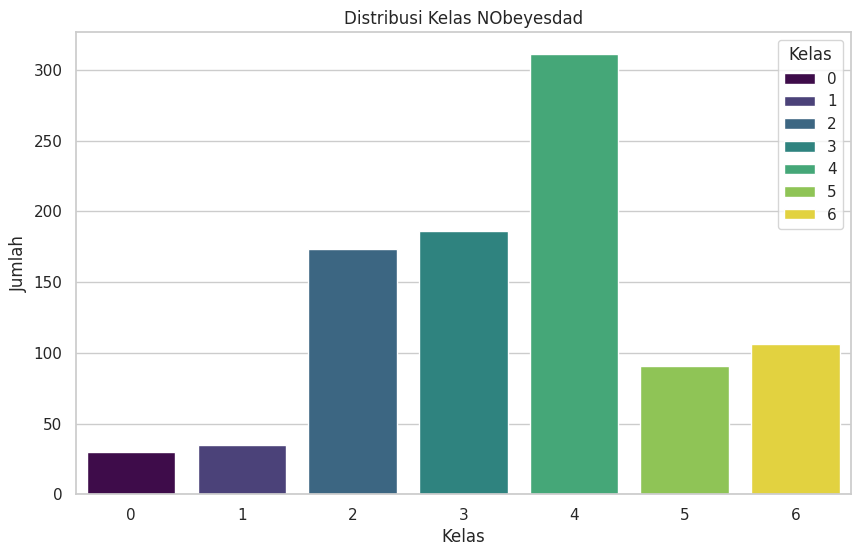

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', hue=class_distribution.index)
plt.title('Distribusi Kelas NObeyesdad')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.legend(title='Kelas')
plt.show()

In [ ]:
# Memisahkan kelas mayoritas dan minoritas
df_majority = df[df['NObeyesdad'] == 'Normal_Weight']
df_minority = df[df['NObeyesdad'] != 'Normal_Weight']

In [ ]:
# Memeriksa jumlah data di kelas mayoritas dan minoritas
print(f"Jumlah data mayoritas (Normal_Weight): {len(df_majority)}")
print(f"Jumlah data minoritas: {len(df_minority)}")

Jumlah data mayoritas (Normal_Weight): 0
Jumlah data minoritas: 932


In [ ]:
# Memeriksa apakah df_minority kosong
if df_minority.empty:
    print("Kelas minoritas tidak ditemukan. Tidak ada data untuk oversampling.")
else:
    # Find the count of the largest class after preprocessing
    largest_class_count = df['NObeyesdad'].value_counts().max()

    df_minority_upsampled = resample(df_minority,
                                      replace=True,
                                      n_samples=largest_class_count,
                                      random_state=123)

    current_class_counts = df['NObeyesdad'].value_counts()
    unique_classes_in_df = df['NObeyesdad'].unique()

    resampled_dfs = []

In [ ]:
for class_label in unique_classes_in_df:
        df_class = df[df['NObeyesdad'] == class_label]
        if len(df_class) < largest_class_count:
            df_class_resampled = resample(df_class,
                                          replace=True,
                                          n_samples=largest_class_count,
                                          random_state=123)
            resampled_dfs.append(df_class_resampled)
        else:
           resampled_dfs.append(df_class)

In [ ]:
    df_balanced = pd.concat(resampled_dfs)
    df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

    df = df_balanced

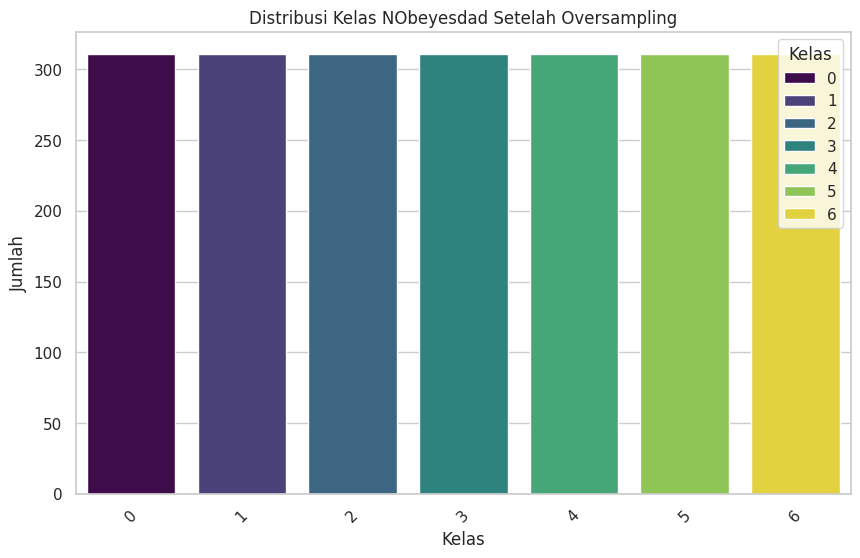

In [ ]:
# Menghitung distribusi kelas setelah oversampling
class_distribution_after_oversampling = df['NObeyesdad'].value_counts()
# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution_after_oversampling.index,
            y=class_distribution_after_oversampling.values,
            palette='viridis',
            hue=class_distribution_after_oversampling.index)
plt.title('Distribusi Kelas NObeyesdad Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Kelas', loc='upper right')
plt.show()

##Normalisasi

In [ ]:
df.describe()

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,NObeyesdad_enc
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.0,2177.000000,2177.000000,2177.0,2177.0,2177.000000,2177.0,2177.000000,2177.000000,2177.0,2177.00000,2177.00000
mean,22.972861,1.733135,87.828081,0.775838,1.0,2.357990,2.972281,0.0,0.0,2.074862,1.0,1.020320,0.797161,1.0,3.00000,3.00000
std,4.460422,0.077128,24.817527,0.464062,0.0,0.536355,0.146718,0.0,0.0,0.549540,0.0,0.854770,0.632001,0.0,2.00046,2.00046
min,14.000000,1.500000,39.000000,0.000000,1.0,1.000000,2.358455,0.0,0.0,1.000000,1.0,0.000000,0.000000,1.0,0.00000,0.00000
25%,19.027574,1.680858,68.058902,1.000000,1.0,2.000000,3.000000,0.0,0.0,1.871033,1.0,0.184917,0.163329,1.0,1.00000,1.00000
50%,22.336216,1.722785,84.783756,1.000000,1.0,2.203962,3.000000,0.0,0.0,2.000000,1.0,1.000000,0.833761,1.0,3.00000,3.00000
75%,25.955014,1.787802,107.998815,1.000000,1.0,3.000000,3.000000,0.0,0.0,2.462916,1.0,1.600431,1.151166,1.0,5.00000,5.00000
max,34.993835,1.975663,165.057269,2.000000,1.0,3.000000,3.390143,0.0,0.0,3.000000,1.0,3.000000,2.000000,1.0,6.00000,6.00000


In [ ]:
# Tentukan fitur yang akan distandarisasi
continuous_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

 Menentukan kolom-kolom numerik kontinu yang akan di transformasi agar berada dalam skala standar (mean = 0, std = 1).

In [ ]:
scaler = StandardScaler()

# Fit dan transformasi fitur numerik
df[continuous_features] = scaler.fit_transform(df[continuous_features])

Transformasi standarisasi pada fitur numerik menggunakan StandardScaler agar semua fitur memiliki skala yang seragam, mencegah fitur dengan nilai besar mendominasi saat pemodelan.

In [ ]:
# Cek ringkasan statistik untuk memastikan mean ~0 dan std ~1
df[continuous_features].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2.177000e+03,2.177000e+03,2.177000e+03,2.177000e+03,2.177000e+03,2.177000e+03,2.177000e+03,2.177000e+03
mean,1.958317e-17,5.458809e-16,5.058986e-16,-4.275659e-16,1.106449e-15,-6.315573e-16,-8.649234e-17,3.100669e-17
std,1.000230e+00,1.000230e+00,1.000230e+00,1.000230e+00,1.000230e+00,1.000230e+00,1.000230e+00,1.000230e+00
min,-2.012124e+00,-3.023416e+00,-1.967936e+00,-2.532468e+00,-4.184665e+00,-1.956380e+00,-1.193952e+00,-1.261619e+00
25%,-8.847130e-01,-6.779585e-01,-7.967644e-01,-6.676024e-01,1.889730e-01,-3.709942e-01,-9.775667e-01,-1.003128e+00
50%,-1.427648e-01,-1.342280e-01,-1.226965e-01,-2.872406e-01,1.889730e-01,-1.362586e-01,-2.377777e-02,5.792450e-02
75%,6.687345e-01,7.089451e-01,8.129484e-01,1.197263e+00,1.889730e-01,7.063045e-01,6.788309e-01,5.602623e-01
max,2.695650e+00,3.145221e+00,3.112596e+00,1.197263e+00,2.848715e+00,1.683862e+00,2.316570e+00,1.903661e+00


Mengecek hasil setelah distandarisasi. Nilai mean akan mendekati 0 dan standar deviasi mendekati 1 jika transformasi berhasil.

In [ ]:
# Mendefinisikan model dengan max_iter yang lebih tinggi
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

KESIMPULAN PREPROCESSING:
1. Seluruh data kategorikal telah dikonversi ke numerik dengan benar.
2. Tidak ditemukan missing values atau duplikasi data.
3. Outlier telah dihapus menggunakan metode IQR.
4. Semua fitur tetap digunakan karena saling melengkapi dan korelasi bervariasi.
5. Ketidakseimbangan data ditangani dengan SMOTE untuk menjaga performa model.
6. Data telah dinormalisasi menggunakan StandardScaler.

#3 Pemodelan dan Evaluasi


##Pemodelan

In [ ]:
y
#Target

,NObeyesdad
6,1
9,1
22,1
24,1
38,1
...,...
2106,4
2107,4
2108,4
2109,4


In [ ]:
X
#fitur

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,...,TUE,CAEC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_enc
6,23.000000,1.500000,55.000000,1,1,3.0,3.0,0,0,2.000000,...,0.000000,1,True,False,False,False,True,False,False,1
9,22.000000,1.720000,68.000000,0,1,2.0,3.0,0,0,2.000000,...,1.000000,1,False,True,False,False,False,True,False,1
22,22.000000,1.650000,60.000000,1,1,3.0,3.0,0,0,2.000000,...,0.000000,1,True,False,True,False,False,False,False,1
24,21.000000,1.850000,68.000000,1,1,2.0,3.0,0,0,2.000000,...,1.000000,1,False,True,False,False,False,True,False,1
38,23.000000,1.650000,67.000000,1,1,2.0,3.0,0,0,2.000000,...,1.000000,1,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,...,0.906247,1,True,False,False,False,False,True,False,4
2107,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,...,0.599270,1,True,False,False,False,False,True,False,4
2108,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,...,0.646288,1,True,False,False,False,False,True,False,4
2109,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,...,0.586035,1,True,False,False,False,False,True,False,4


In [ ]:
columns_to_standardize = ['Height', 'Weight']
scaler = StandardScaler()

In [ ]:
# Melakukan standarisasi
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [ ]:
# Mengonversi variabel kategorikal menjadi numerik jika diperlukan
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Mendefinisikan model dengan max_iter yang lebih tinggi
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Meningkatkan max_iter
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
results = {}

In [ ]:
# Melatih dan mengukur waktu eksekusi untuk setiap model
for model_name, model in models.items():
    start_time = time.time()  # Mulai waktu
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
    end_time = time.time()  # Akhiri waktu
    execution_time = end_time - start_time  # Menghitung waktu eksekusi
    results[model_name] = {
        'accuracy': accuracy,
        'execution_time': execution_time
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Mengonversi hasil ke DataFrame untuk kemudahan analisis
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='execution_time')  # Mengurutkan berdasarkan waktu eksekusi

In [ ]:
# Menampilkan hasil
print("Hasil Pemodelan dan Evaluasi:")
print(results_df)

Hasil Pemodelan dan Evaluasi:
                           accuracy  execution_time
Decision Tree              0.967914        0.027090
Naive Bayes                1.000000        0.047052
K-Nearest Neighbors        0.919786        0.077621
Support Vector Classifier  0.625668        0.154375
Random Forest              1.000000        1.070042
Logistic Regression        0.973262        7.344382


In [ ]:
# Memilih 3 model tercepat
top_3_models = results_df.nsmallest(3, 'execution_time')
print("\n3 Model Tercepat:")
print(top_3_models)


3 Model Tercepat:
                     accuracy  execution_time
Decision Tree        0.967914        0.027090
Naive Bayes          1.000000        0.047052
K-Nearest Neighbors  0.919786        0.077621


## Evaluasi

In [ ]:
# Menyimpan hasil evaluasi untuk setiap model
evaluation_results = {}

In [ ]:
# Melakukan evaluasi untuk setiap model tercepat
for model_name in top_3_models.index:
    model = models[model_name]  # Mengambil model dari dictionary
    y_pred = model.predict(X_test)  # Memprediksi data uji

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil evaluasi
    evaluation_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

In [ ]:
# Mengonversi hasil ke DataFrame untuk kemudahan analisis
evaluation_df = pd.DataFrame(evaluation_results).T

In [ ]:
# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model Tercepat:")
print(evaluation_df)

Hasil Evaluasi Model Tercepat:
                     accuracy  precision    recall  f1_score
Decision Tree        0.967914   0.968576  0.967914  0.967728
Naive Bayes          1.000000   1.000000  1.000000  1.000000
K-Nearest Neighbors  0.919786   0.933979  0.919786  0.918215


In [ ]:
# Menampilkan Confusion Matrix untuk setiap model
for model_name in top_3_models.index:
    model = models[model_name]
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

##Visualisasi

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

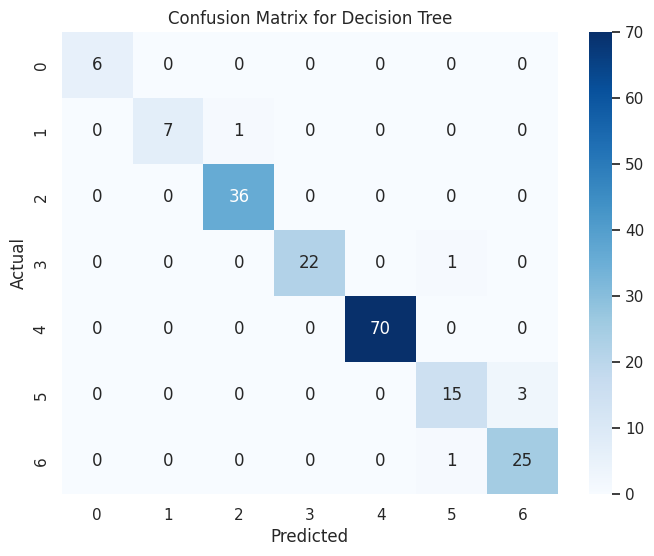

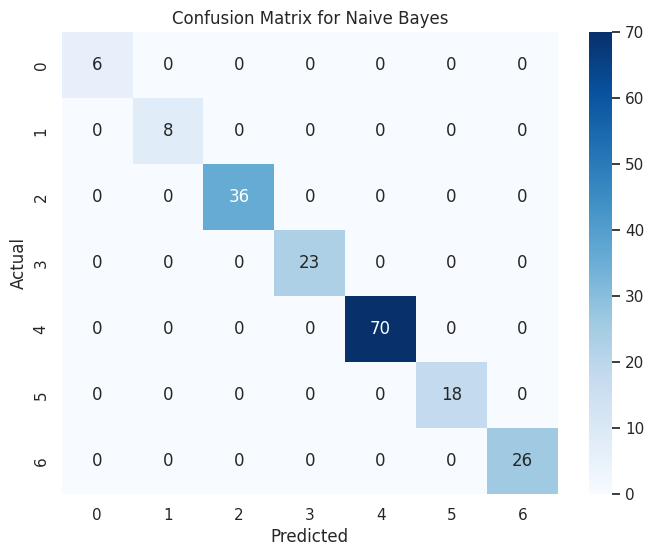

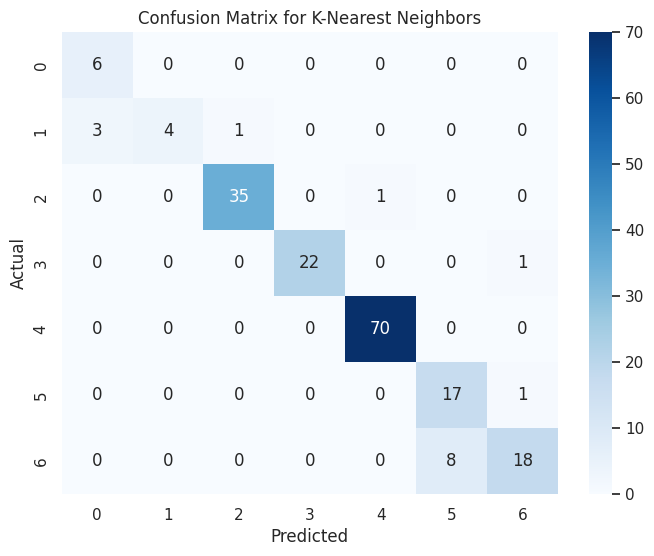

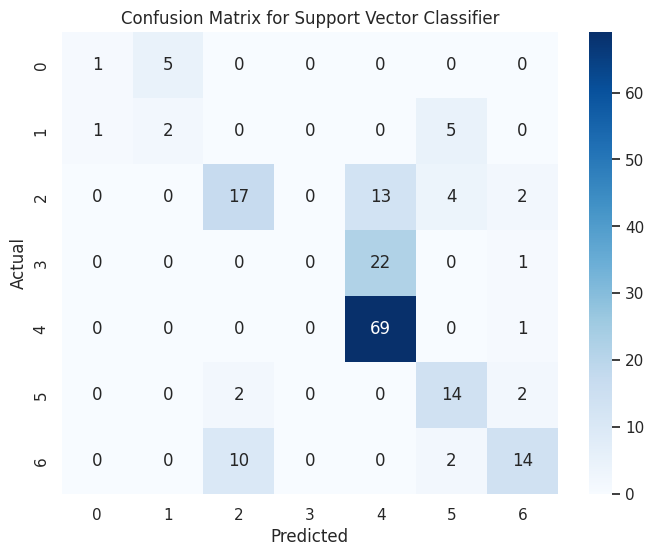

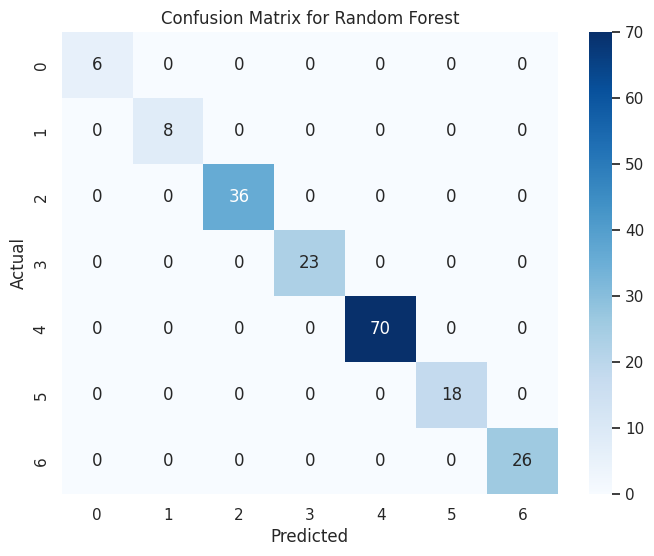

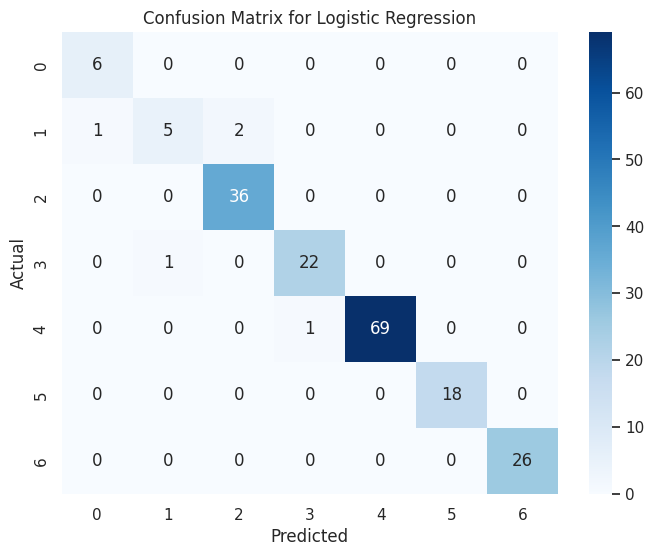

In [ ]:
# Visualisasi Confusion Matrix untuk setiap model
for model_name in results_df.index:
    model = models[model_name]
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Membuat grafik batang untuk perbandingan metrik evaluasi
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metrics_df = evaluation_df[metrics]

<ipython-input-104-f98d63f561ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-104-f98d63f561ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-104-f98d63f561ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-104-f98d63f561ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

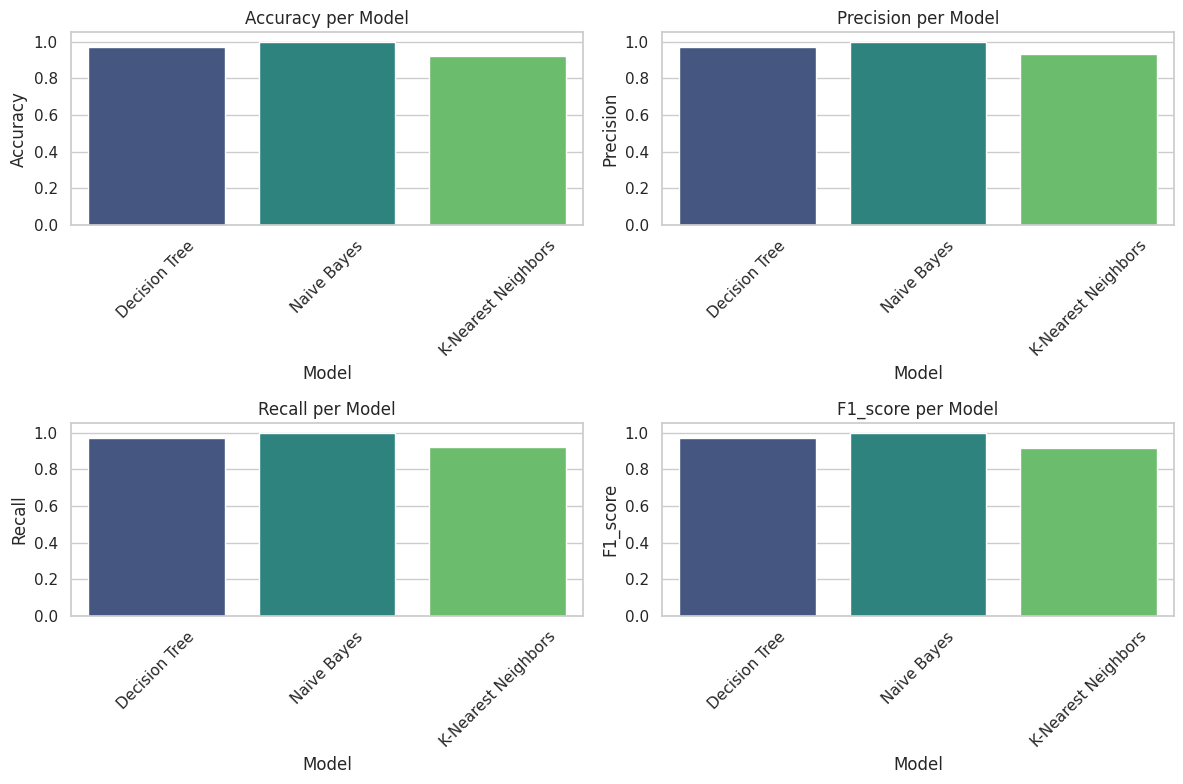

In [ ]:
# Membuat grafik batang untuk perbandingan metrik evaluasi
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metrics_df = evaluation_df[metrics]
# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))
# Membuat grafik batang untuk setiap metrik
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
    plt.title(f'{metric.capitalize()} per Model')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#4 Hyperparameter Tuning


In [ ]:
# Mendefinisikan model Random Forest
rf_model = RandomForestClassifier()

In [ ]:
# Menentukan parameter yang akan dicari
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Mengganti 'auto' dengan 'sqrt' dan 'log2'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
# Menggunakan RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                       param_distributions=param_dist,
                                       n_iter=100,
                                       cv=3,
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

In [ ]:
# Melatih model dengan RandomizedSearchCV
rf_random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [ ]:
# Menampilkan hasil terbaik
print("Best Parameters:", rf_random_search.best_params_)
print("Best Score:", rf_random_search.best_score_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Best Score: 0.9959731398713133


In [ ]:
# Melatih ulang model dengan parameter terbaik
best_rf_model = RandomForestClassifier(**rf_random_search.best_params_)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_split=5, n_estimators=50)

In [ ]:
# Memprediksi data uji
y_pred_best = best_rf_model.predict(X_test)

In [ ]:
# Menghitung metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

In [ ]:
# Menyimpan hasil evaluasi model terbaik
evaluation_results['Best Random Forest'] = {
    'accuracy': accuracy_best,
    'precision': precision_best,
    'recall': recall_best,
    'f1_score': f1_best
}

In [ ]:
# Mengonversi hasil ke DataFrame untuk kemudahan analisis
evaluation_df_updated = pd.DataFrame(evaluation_results).T

In [ ]:
# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model Setelah Optimasi:")
print(evaluation_df_updated)

Hasil Evaluasi Model Setelah Optimasi:
                     accuracy  precision    recall  f1_score
Decision Tree        0.967914   0.968576  0.967914  0.967728
Naive Bayes          1.000000   1.000000  1.000000  1.000000
K-Nearest Neighbors  0.919786   0.933979  0.919786  0.918215
Best Random Forest   0.994652   0.994797  0.994652  0.994630


In [ ]:
# Visualisasi perbandingan performa antar model sebelum dan sesudah optimasi
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metrics_df = evaluation_df_updated[metrics]

<ipython-input-138-301e6a8dbbde>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-138-301e6a8dbbde>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-138-301e6a8dbbde>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
<ipython-input-138-301e6a8dbbde>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

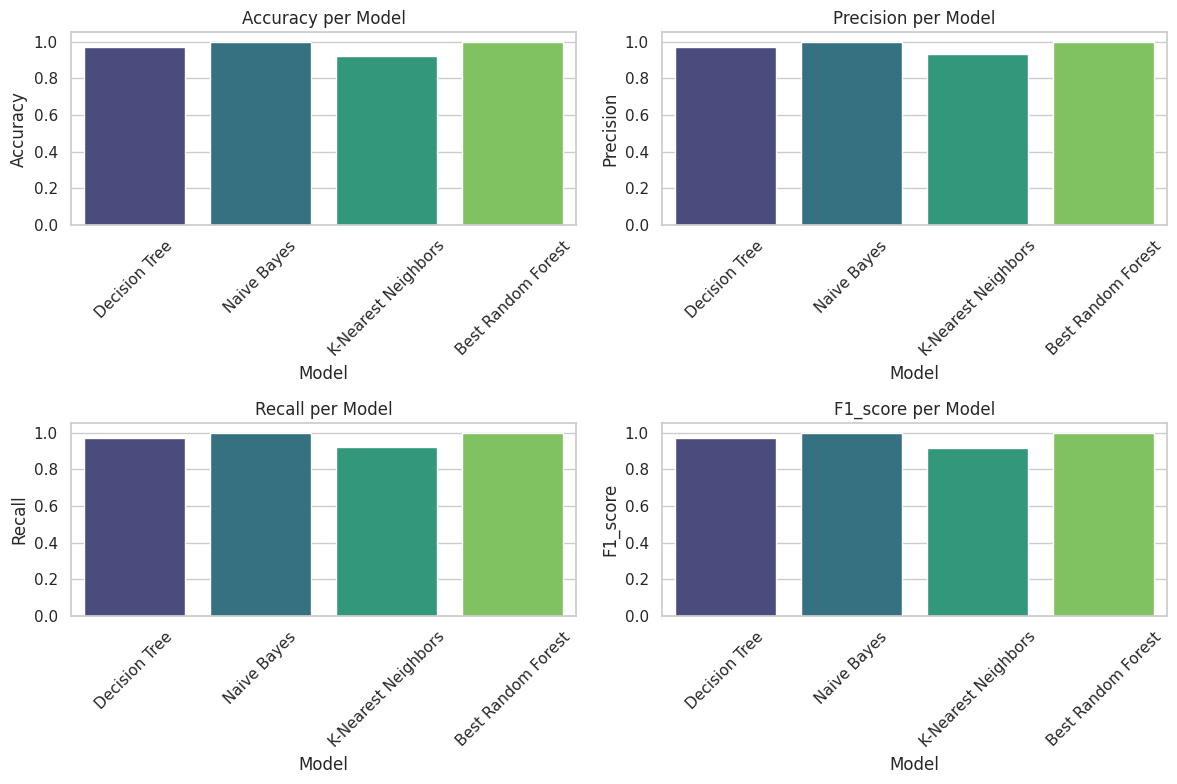

In [ ]:
# Memastikan tidak ada nilai NaN dalam DataFrame
evaluation_df_updated = evaluation_df_updated.fillna(0)

# Visualisasi perbandingan performa antar model sebelum dan sesudah optimasi
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
metrics_df = evaluation_df_updated[metrics]

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang untuk setiap metrik
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=metrics_df.index, y=metrics_df[metric], palette='viridis')
    plt.title(f'{metric.capitalize()} per Model')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#.

.

.

.

.

.

.

.

.

###cek data hilang


In [ ]:
print("Jumlah missing values:")
print(df.isnull().sum())

In [ ]:
df.info()

In [ ]:
df.describe()

###Hapus Missing Values (jika ada)


In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df.describe()

###Cek data Duplikasi

In [ ]:
print(f"Duplikasi ditemukan: {df.duplicated().sum()} baris")
df = df.drop_duplicates()

setelah ditemukan sebanyak 24 baris maka akan di hapus data yg duplikat itu

###Cek Tipe Data

In [ ]:
print(df.dtypes)

###Buatkan label untuk mempermudah pembacaan pada dataset

In [ ]:
df.head()

In [ ]:
df.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain",
                 "capitalloss","hoursperweek","nativecountry","income"]

In [ ]:
df.head()


###Cek Outlier (menggunakan Z-score)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(df[numeric_cols]))


fig, axes = plt.subplots(1, 2, figsize=(14, 7))
sns.boxplot(data=df[numeric_cols], ax=axes[0])
axes[0].set_title('Distribusi Sebelum Penghapusan Outlier')


df_cleaned = df[(z_scores < 3).all(axis=1)]
sns.boxplot(data=df_cleaned[numeric_cols], ax=axes[1])
axes[1].set_title('Distribusi Setelah Penghapusan Outlier')

plt.tight_layout()
plt.show()

###Encoding data bertipe Kategorikal

In [ ]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.dtypes)

###Oversampling (SMOTE)

In [ ]:
X = df.drop('income', axis=1)
y = df['income']

In [ ]:
print("Distribusi sebelum SMOTE:")
print(y.value_counts())

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())

###Standardisasi

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
col_index = 0
col_name = X.columns[col_index]

plt.figure(figsize=(12, 5))

In [ ]:
#sebelum
plt.subplot(1, 2, 1)
sns.histplot(X_resampled.iloc[:, col_index], kde=True, color='skyblue')
plt.title(f'📊 Sebelum Standardisasi - {col_name}')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')


In [ ]:
#sesudah
plt.subplot(1, 2, 2)
sns.histplot(X_scaled[:, col_index], kde=True, color='salmon')
plt.title(f'📈 Setelah Standardisasi - {col_name}')
plt.xlabel('Nilai Z-Score')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
y_train

##Modeling & Evaluasi

###Melatih dan Evaluasi Model

In [ ]:
#model yang digunakan sebagai patokan dan pemprosesan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

melatih model

In [ ]:
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "report": report,
        "confusion_matrix": cm,
        "training_time": training_time
    }

In [ ]:
for name, result in results.items():
    print(f"\n Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

###Ringkasan Hasil Evaluasi


In [ ]:
summary = []
for name, res in results.items():
    report = res["report"]
    summary.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "Training Time": res["training_time"]
    })

summary_df = pd.DataFrame(summary).sort_values(by="Accuracy", ascending=False)
print(summary_df)

###Kesimpulan dan Rekomendasi

In [ ]:
best_model = summary_df.iloc[0]
print("\n Model Terbaik:")
print(best_model)